In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 15, 5

In [2]:
images_names = glob.glob("../../images/tests/*.JPG")

In [20]:
def auto_Canny(image, sigma=0.2):
    
    v = np.mean(image)
 
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    
    return edged

In [16]:
def resize(image, dheight):
    h, w = image.shape[:2]
    dwidth = int((1. * dheight / h) * w)
    return cv2.resize(image, (dwidth, dheight))

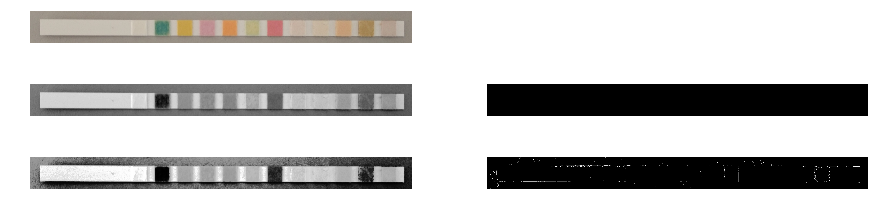

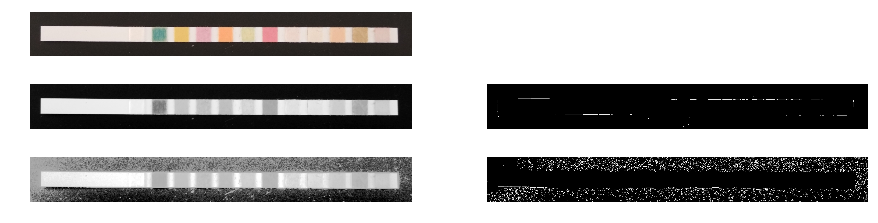

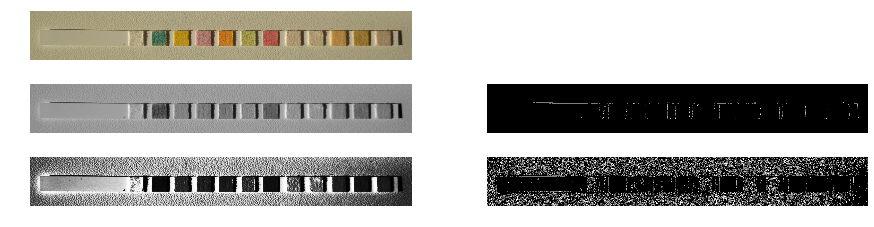

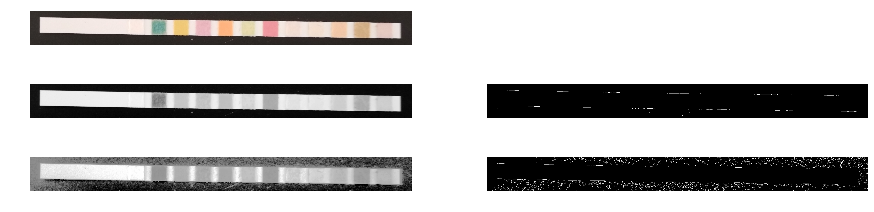

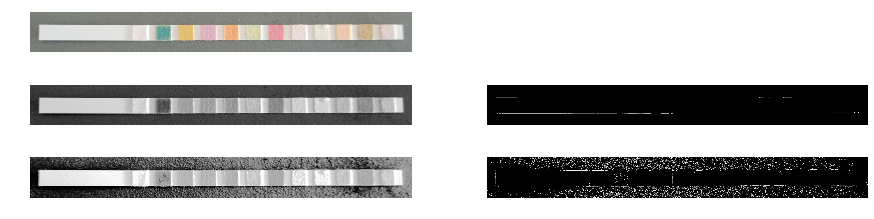

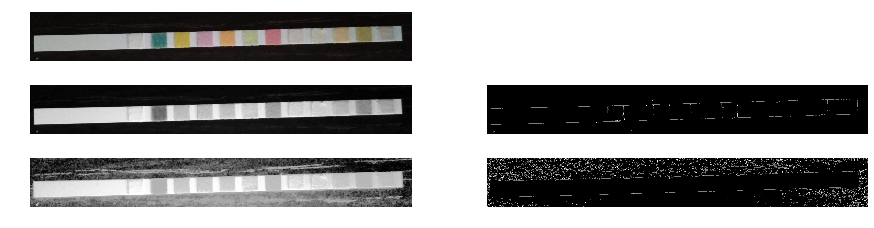

In [21]:
for image_name in images_names:
    
    image_rgb = cv2.cvtColor(cv2.imread(image_name, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    image_rgb = resize(image_rgb, 300)
    image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    image_blurred = cv2.bilateralFilter(image_gray, 5, 100, 100)
    image_he = cv2.equalizeHist(image_blurred)
    
    plt.subplot(4, 2, 1)
    plt.axis('off')
    plt.imshow(image_rgb)
    plt.subplot(4, 2, 3)
    plt.axis('off')
    plt.imshow(image_blurred, cmap='gray')
    plt.subplot(4, 2, 4)
    plt.axis('off')
    plt.imshow(auto_Canny(image_blurred), cmap='gray')
    plt.subplot(4, 2, 5)
    plt.axis('off')
    plt.imshow(image_he, cmap='gray')
    plt.subplot(4, 2, 6)
    plt.axis('off')
    plt.imshow(auto_Canny(image_he), cmap='gray')
    plt.show()